In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount)<1: drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/pjreddie/darknet.git
import os
os.chdir("/content/darknet/")
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

In [3]:
import cv2
import matplotlib.pyplot as plt
import os.path

def show_image(file):
  fig,ax = plt.subplots()
  ax.tick_params(labelbottom="off",bottom="off")
  ax.tick_params(labelleft="off",left="off")
  ax.set_xticklabels([])
  ax.axis('off')

  if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(show_img)


# yolo v1 test

In [4]:
!cp /content/drive/MyDrive/Lec_Capture/_data/yolo/tiny-yolov1.weights /content

In [ ]:
!./darknet yolo test              \
 /content/darknet/cfg/yolov1.cfg  \
 /content/yolov1.weights          \
 /content/darknet/data/dog.jpg

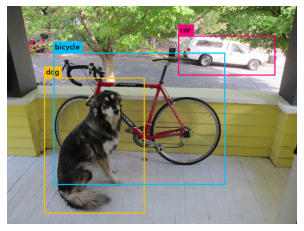

In [6]:
show_image('/content/darknet/predictions.jpg')

# yolo v3 test

In [8]:
# !ls  /content/darknet/cfg/|grep v3
!cp /content/drive/MyDrive/Lec_Capture/_data/yolo/yolov3.weights /content
!rm /content/darknet/predictions.jpg

In [14]:
!ls cfg/coco*

cfg/coco.data


In [15]:
!./darknet detector test              \
 /content/darknet/cfg/coco.data   \
 /content/darknet/cfg/yolov3.cfg  \
 /content/yolov3.weights          \
 /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

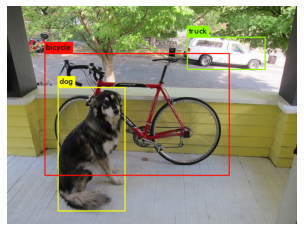

In [16]:
show_image('/content/darknet/predictions.jpg')

# Yolo v4 test

In [23]:
!ls  /content/darknet/cfg/|grep v4
!cp /content/drive/MyDrive/Lec_Capture/_data/yolo_v4/yolov4.weights /content
!rm /content/darknet/predictions.jpg

yolov4.cfg
rm: cannot remove '/content/darknet/predictions.jpg': No such file or directory


In [62]:
!./darknet detector test              \
 /content/darknet/cfg/coco.data   \
 /content/darknet/cfg/yolov4.cfg  \
 /content/yolov4.weights          \
 /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  32  0.075 BFLOPs
    1 conv     64  3 x 3 / 2   208 x 208 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    2 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64  0.797 BFLOPs
    3 route  2
Unused field: 'groups = 2'
Unused field: 'group_id = 1'
    4 conv     32  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  32  0.399 BFLOPs
    5 conv     32  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  32  0.199 BFLOPs
    6 route  5 4
    7 conv     64  1 x 1 / 1   104 x 104 x  64   ->   104 x 104 x  64  0.089 BFLOPs
    8 route  2 7
    9 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
   10 conv    128  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 128  0.797 BFLOPs
   11 route  10
Unused field: 'groups = 2'
Unused field: 'group_id = 1'
   12 conv     64  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x  64  0.399 BFLOPs
   13 conv    

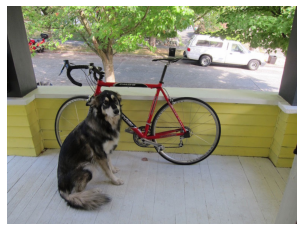

In [59]:
show_image('/content/darknet/predictions.jpg')